Imports

In [1]:
#------------------ General Purpose Imports ---------------------#
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer

#------------------ Machine Learning Imports ---------------------#
import torch
import scipy
import torch.utils.data
from sklearn.model_selection import train_test_split

#------------------ Dataset imports ---------------------#
import dysts
from dysts.flows import *
from dysts import flows
from dysts.systems import make_trajectory_ensemble


In [2]:
#------------------ system imports ---------------------#
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../..')))

#------------------ reservoirgrid imports ---------------------#
from reservoirgrid.models import Reservoir
from reservoirgrid.helpers import utils
from reservoirgrid.helpers import viz
from reservoirgrid.helpers import chaos_utils
from reservoirgrid.helpers import reservoir_tests
#--------------------------------------------------------------#

device setting

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Loading Datasets

In [4]:
lorenz = np.load("../../reservoirgrid/datasets/Chaotic/Lorenz.npy", allow_pickle=True)

In [5]:
attractor1 = lorenz[1]
attractor2 = lorenz[15]

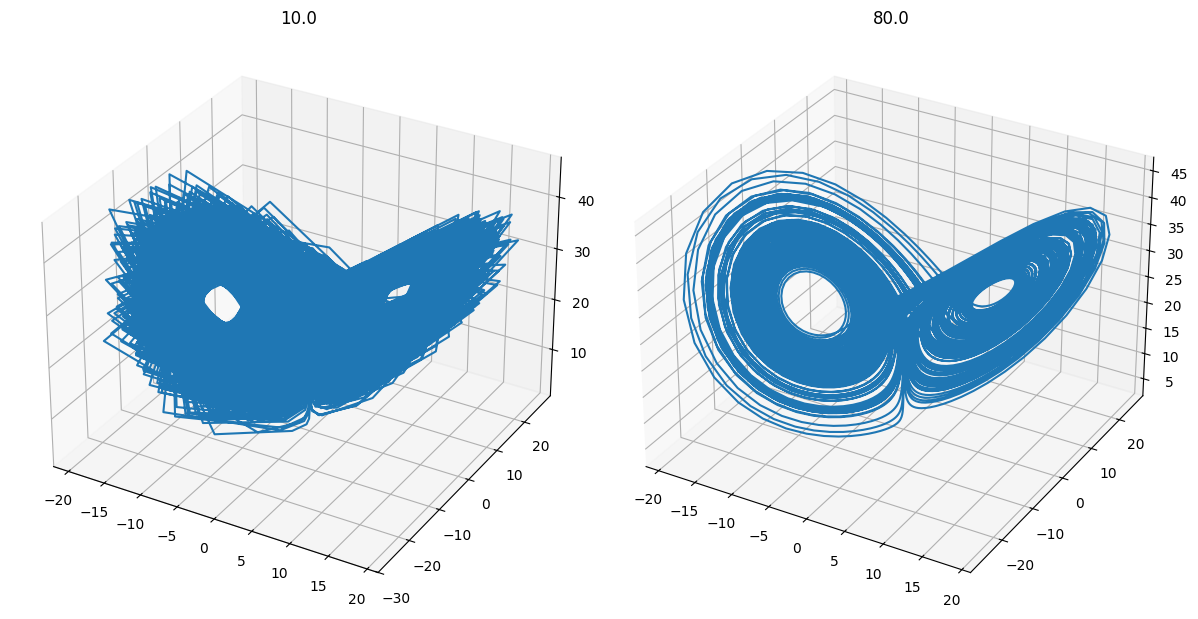

In [6]:
viz.compare_plot(datasets=[attractor1[1],attractor2[1]], titles=[attractor1[0],attractor2[0]])

In [7]:
Hopfield = np.load("../../reservoirgrid/datasets/Chaotic/Hopfield.npy", allow_pickle=True)
attractor1 = Hopfield[5]
attractor2 = Hopfield[19]

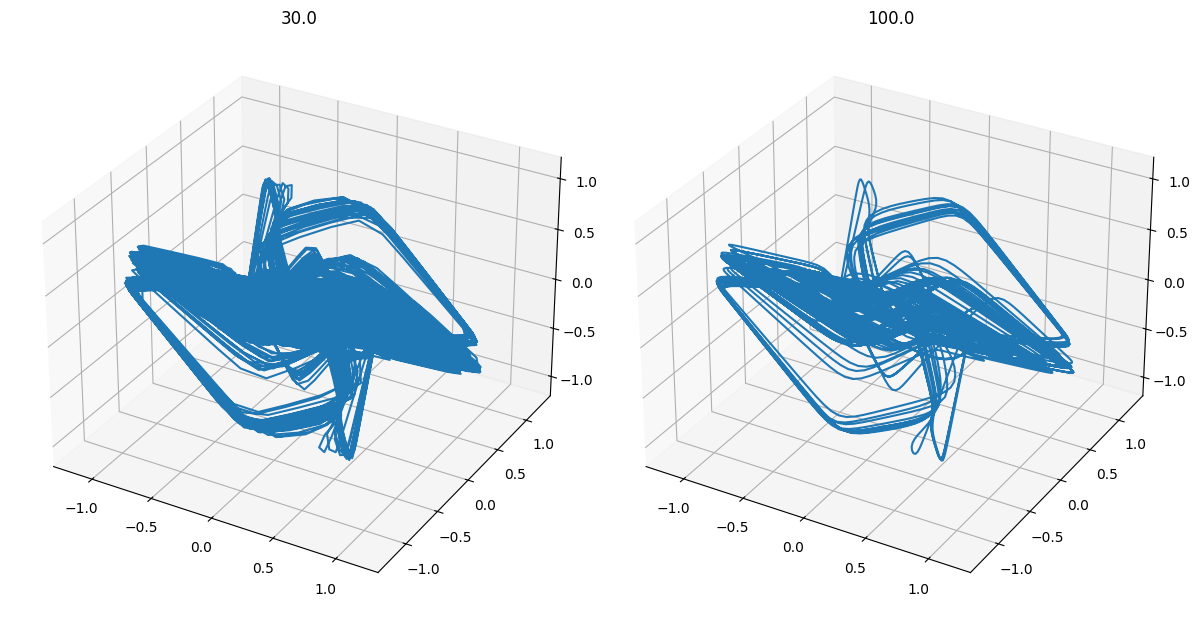

In [8]:
viz.compare_plot(datasets=[attractor1[1][:,0:3],attractor2[1][:,0:3]], titles=[attractor1[0],attractor2[0]])

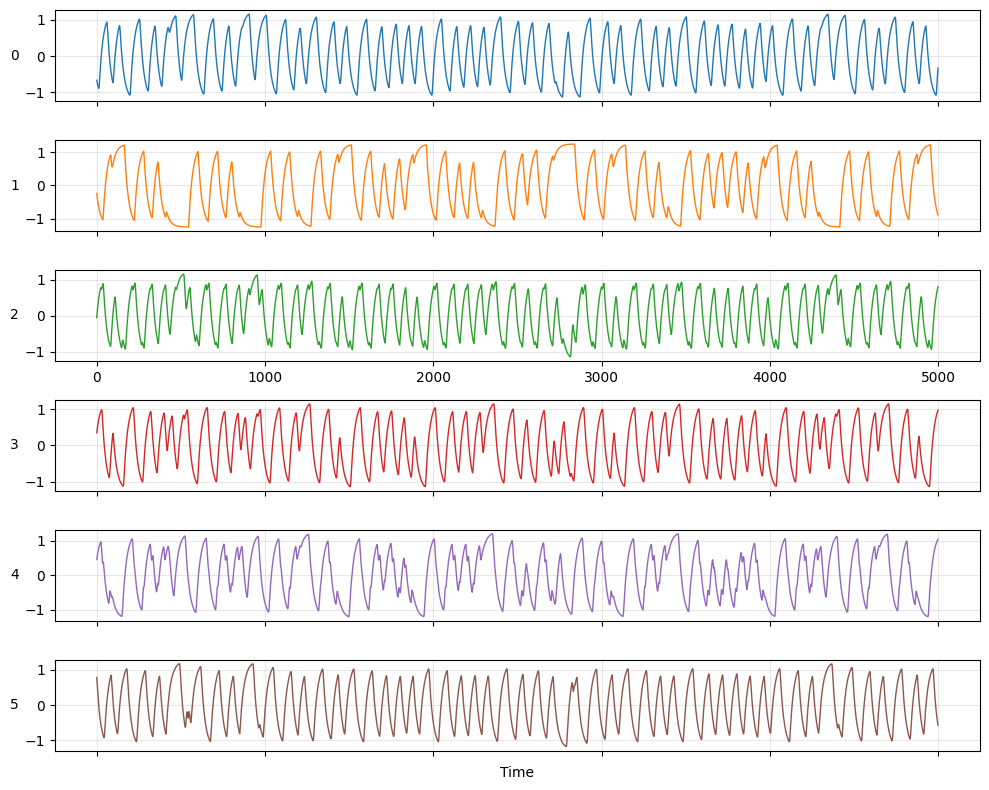

In [9]:
viz.plot_components(attractor2[1][:][:5000], linewidth=1)

## Data processing

In [24]:
data1 = lorenz[2][1]
data1 = utils.normalize_data(data1)
train_inputs, test_inputs, train_targets, test_targets = utils.split(data1)

## Trainig and predictions

In [29]:
Res = Reservoir(
    input_dim=3,
    reservoir_dim=1500,
    output_dim=3,
    spectral_radius=0.9,
    leak_rate=0.3,
    sparsity=0.95,
    input_scaling=0.8,
    noise_level = 0.01)

Res.to(device)

Res.train_readout(train_inputs, train_targets, warmup=1000)
time_steps = np.arange(len(test_targets))

# Generate predictions using test inputs
with torch.no_grad():
    predictions = Res.predict(train_inputs, steps=len(test_targets))

error = Res.RMSE(test_targets[:],predictions[:])
print(f"RMSE: {error:.4f}")
predictions = predictions.cpu().numpy()
test_targets_np = test_targets.cpu().numpy()

Readout training complete.
RMSE: 0.3175


## Visulization

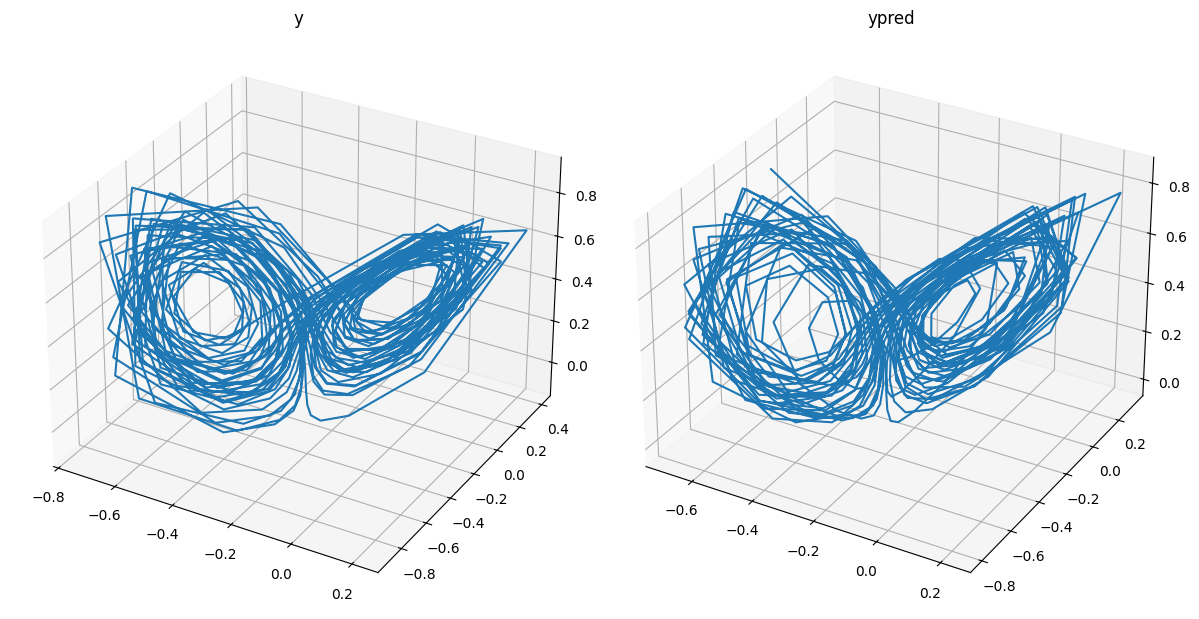

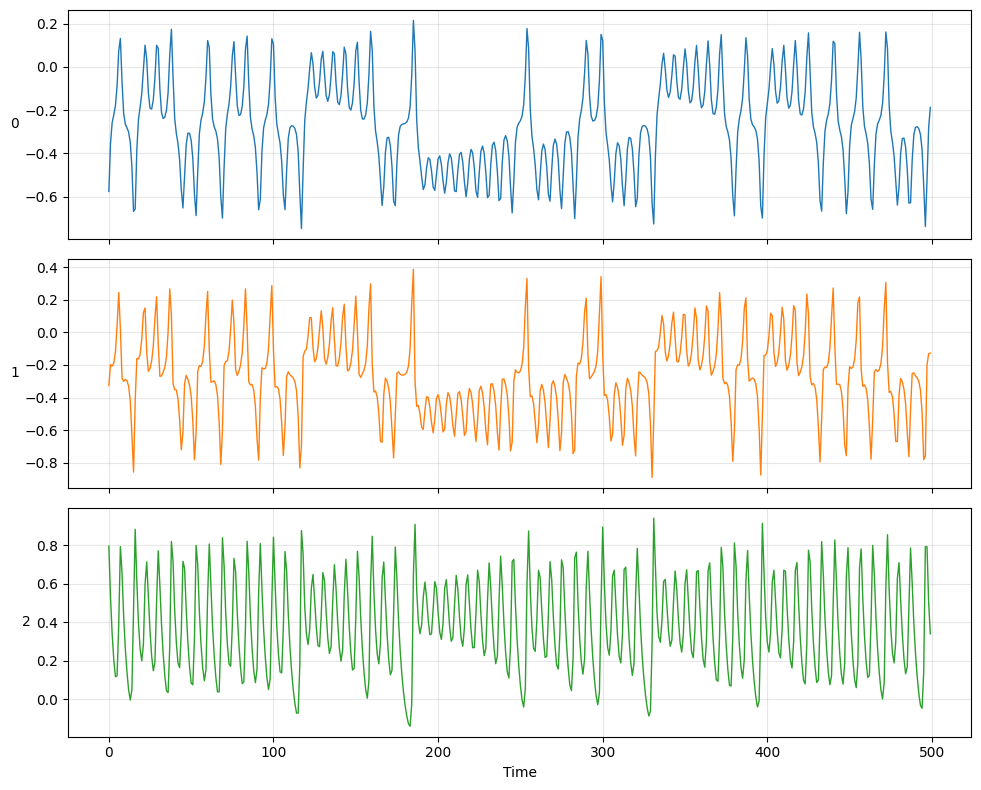

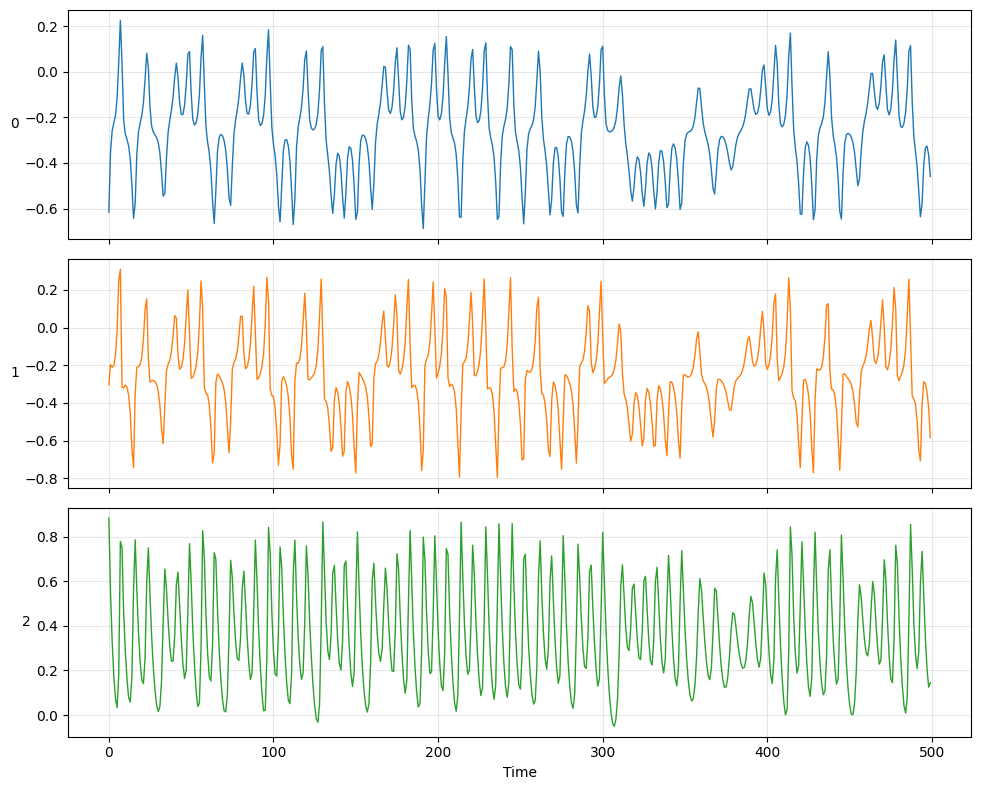

In [31]:
for_plot = test_targets_np[:500,:3], predictions[:500,:3]
viz.compare_plot(for_plot, titles=["y", "ypred"])
viz.plot_components(test_targets[:500], linewidth=1)
viz.plot_components(predictions[:500], linewidth=1)